## Anàlisi de la distribució de dades

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

UNPROCESSED

In [12]:
# Carregar el fitxer
df = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/RNAseq_un_merged.csv')

#eliminació de gens amb expressió nul·la en totes les mostres
df_filtered = df.loc[:, (df != 0).any(axis=0)] 

In [13]:
df

,record_id,1,10,100,1000,10000,10001,10002,10003,100033411,...,9987,9988,9989,999,9990,9991,9992,9993,9994,Condició
0,R032,0,0,2,0,35,3,1,0,0,...,2,3,2957,38,4,86,0,13,394,SA
1,R036,0,0,0,0,18,0,1,0,0,...,0,0,2720,12,0,36,0,2,335,SA
2,R047,15,0,93,901,1682,515,2,127,0,...,13698,2033,3402,19544,419,8414,0,2368,239,SA
3,R049,3,4,102,58,835,528,2,58,0,...,14431,1399,3003,16453,357,8941,0,2424,312,SA
4,R050,0,0,59,511,963,463,1,59,0,...,12897,1303,2333,14621,264,5199,0,2041,105,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,R419,36,0,16,318,2005,235,2,123,2,...,3502,1250,849,3355,494,2044,1,2513,352,SA
121,R420,4,0,28,424,1478,106,7,251,0,...,3544,997,984,4471,447,2470,0,2238,232,SA
122,R421,12,0,42,253,1634,123,15,405,0,...,4822,1146,1118,3492,455,2630,0,2374,222,SA
123,R424,11,0,48,357,1079,181,0,172,2,...,3763,594,942,3982,368,2155,0,1662,183,SA


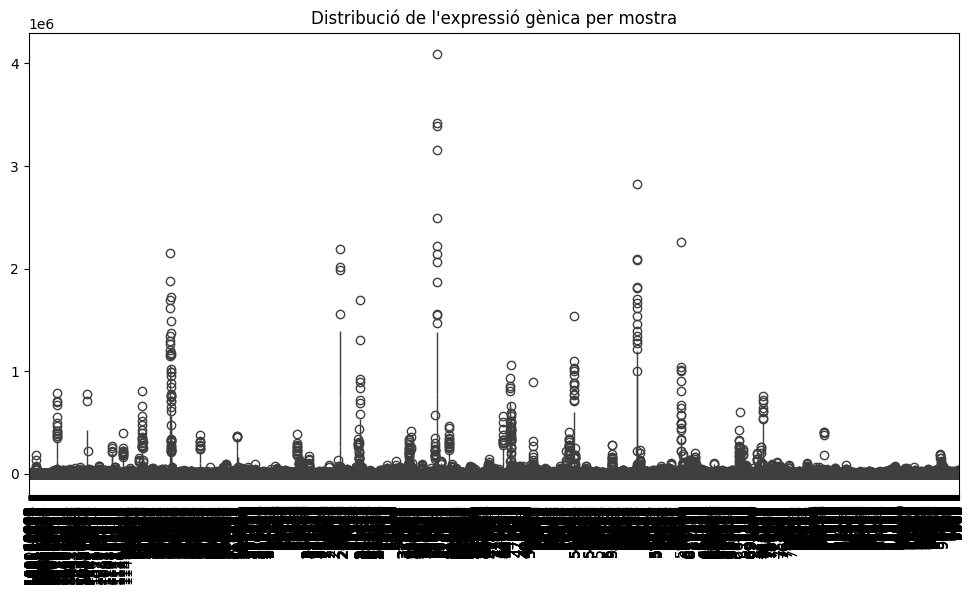

In [14]:
# Representació de la distribució de l'expressió gènica
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:])  # Suposant que la primera columna és un identificador
plt.xticks(rotation=90)
plt.title("Distribució de l'expressió gènica per mostra")
plt.show()

/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_1460/4184885836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condició', y='Valor', data=df_long, palette='Set2')


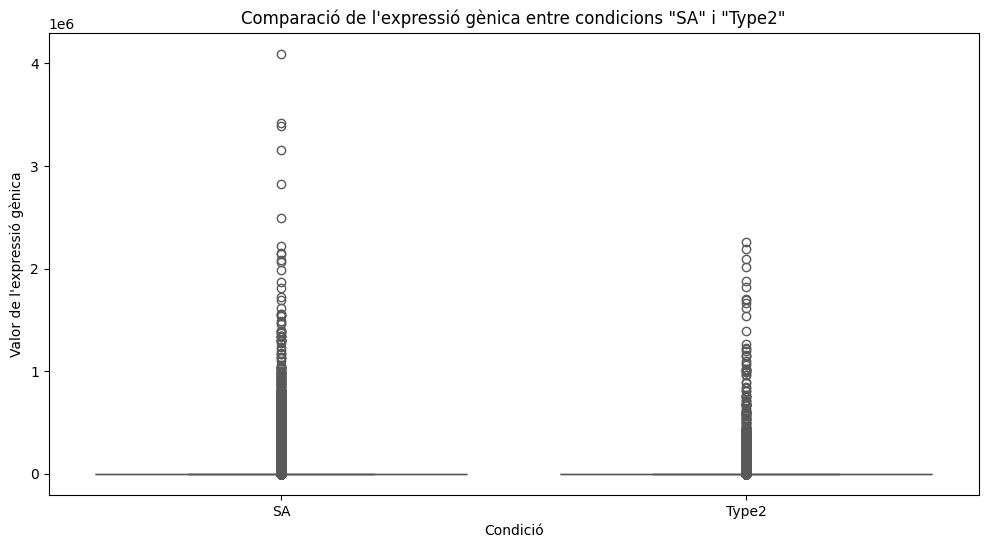

In [15]:

# Seleccionar les columnes que contenen les dades numèriques dels gens
columns_genes = [col for col in df.columns if col not in ['record_id', 'Condició']]

# Reestructurar les dades de "wide" a "long" (només amb les columnes dels gens)
df_long = pd.melt(df, id_vars=['Condició'], value_vars=columns_genes, var_name='Gen', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Condició', y='Valor', data=df_long, palette='Set2')
plt.title('Comparació de l\'expressió gènica entre condicions "SA" i "Type2"')
plt.xlabel('Condició')
plt.ylabel('Valor de l\'expressió gènica')
plt.show()

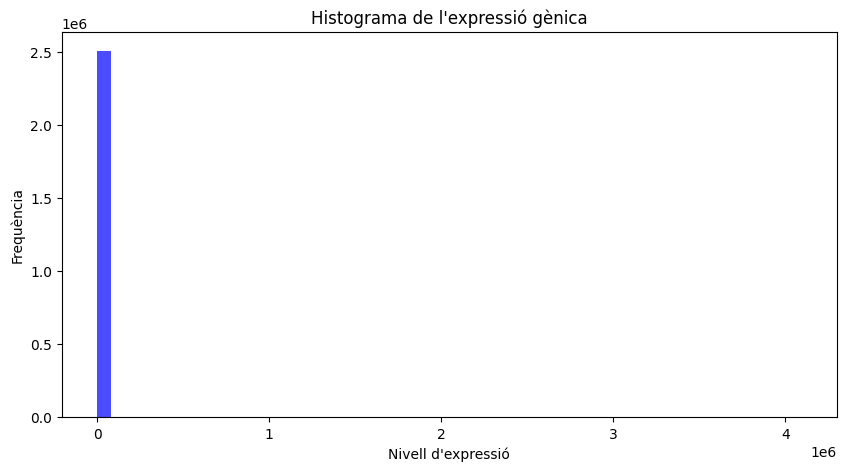

In [16]:
# Histograma de l'expressió per tots els pacients

# Filtrar les columnes numèriques del DataFrame (excloent 'record_id' i 'Condició')
df_numeric = df.select_dtypes(include=['number'])

# Histograma de l'expressió per tots els pacients
plt.figure(figsize=(10, 5))
plt.hist(df_numeric.values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Histograma de l'expressió gènica")
plt.xlabel("Nivell d'expressió")
plt.ylabel("Frequència")
plt.show()


PROCESSED

In [18]:
# Carregar el fitxer
df = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/RNAseq_p_merged.csv')

#eliminació de gens amb expressió nul·la en totes les mostres
df_filtered = df.loc[:, (df != 0).any(axis=0)] 

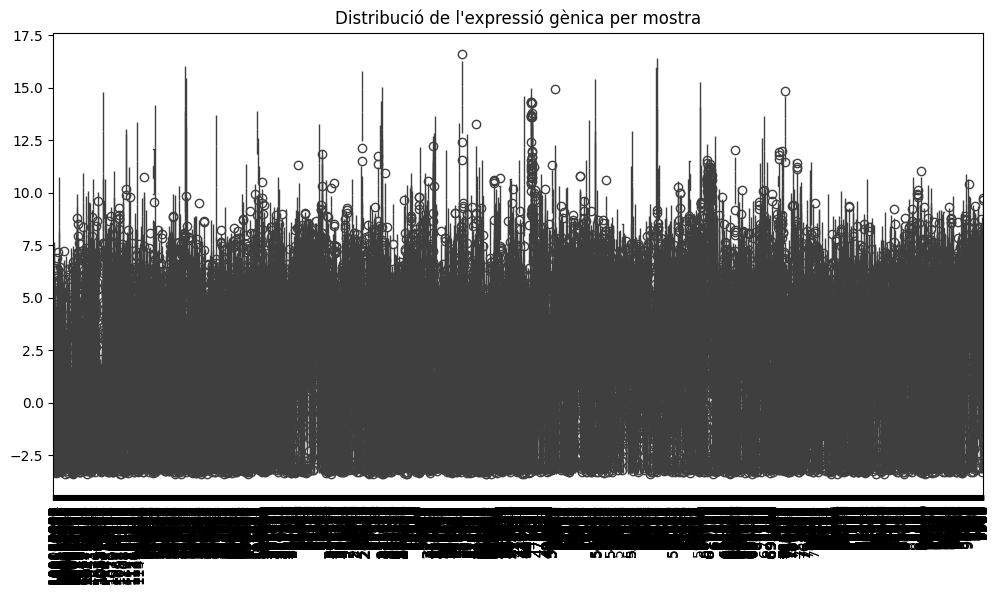

In [19]:
# Representació de la distribució de l'expressió gènica
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:])  
plt.xticks(rotation=90)
plt.title("Distribució de l'expressió gènica per mostra")
plt.show()

/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_1460/1731611549.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condició', y='Valor', data=df_long, palette='Set2')


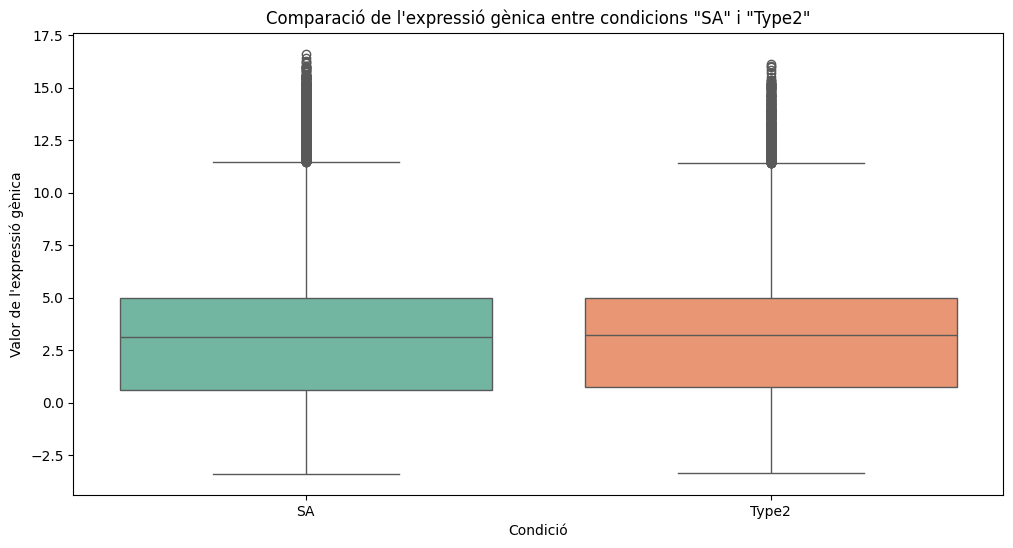

In [20]:
# Seleccionar les columnes que contenen les dades numèriques dels gens
columns_genes = [col for col in df.columns if col not in ['record_id', 'Condició']]

# Reestructurar les dades de "wide" a "long" (només amb les columnes dels gens)
df_long = pd.melt(df, id_vars=['Condició'], value_vars=columns_genes, var_name='Gen', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Condició', y='Valor', data=df_long, palette='Set2')
plt.title('Comparació de l\'expressió gènica entre condicions "SA" i "Type2"')
plt.xlabel('Condició')
plt.ylabel('Valor de l\'expressió gènica')
plt.show()

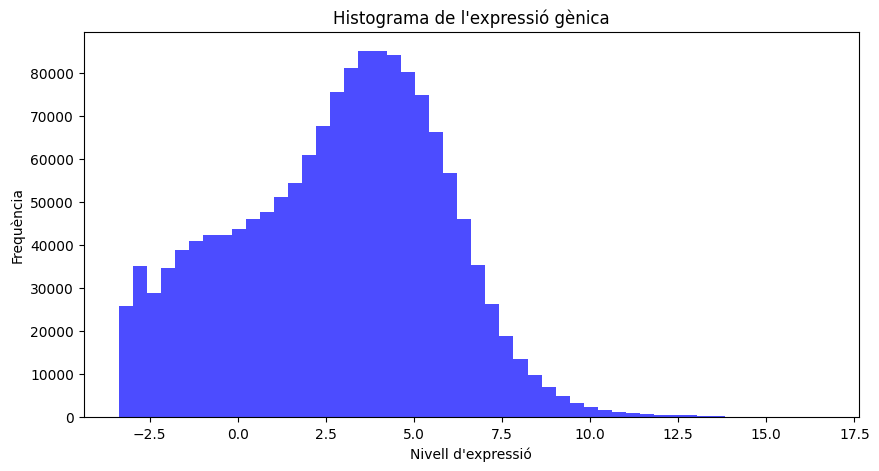

In [21]:
# Histograma de l'expressió per tots els pacients

# Filtrar les columnes numèriques del DataFrame (excloent 'record_id' i 'Condició')
df_numeric = df.select_dtypes(include=['number'])

# Histograma de l'expressió per tots els pacients
plt.figure(figsize=(10, 5))
plt.hist(df_numeric.values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Histograma de l'expressió gènica")
plt.xlabel("Nivell d'expressió")
plt.ylabel("Frequència")
plt.show()
